In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_CE.json
5.	dc_EEG_18d_12c_6s_10r_12w_MSE.json
6.	dc_EEG_18d_9c_3s_5r_9w_RR.json
7.	dc_EEG_1d_1c_3s_2r_3w_RR.json
8.	dc_EEG_1d_2c_1s_4r_2w.json
9.	dc_EEG_1d_2c_1s_4r_4w.json
10.	dc_EEG_3d_1c_1s_1r_1w.json
11.	dc_EEG_4d_3c_3s_2r_3w.json
12.	dc_EEG_8d_1c_3s_2r_3w_RR.json
13.	dc_EEG_8d_3c_3s_2r_3w.json
14.	dc_EEG_8d_3c_3s_2r_3w_RR.json
15.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
16.	dc_EEG_8d_3c_3s_5r_3w_RR.json
17.	dc_EEG_8d_8c_3s_5r_8w_RR.json
18.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
19.	dc_dist_14d.json
20.	dc_dist_2d_3c_2s_3r_6w.json
21.	dc_fed_dist_14d.json
22.	dc_fed_dist_2d_3c_2s_3r_6w.json
23.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
24.	dc_mnist_13d_12w_4r_3s_3tokens.json
25.	dc_mnist_4w_5d_4r_4s_rr.json
26.	dc_synt_8d_8w_2c_4s_4r.json
27.	dc_synt_8d_8w_4c_6r_4s.json
28.	dc_synt_dis

In [4]:
dc = 8
conn = 25
exp = 1
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_1Devices_2Persons_RR_9Epochs"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-13 06:12:38,784] 
Network components:
                 Receiver's Address: http://10.0.0.11:8082
                 Frequency: 5 [batches/sec]
                 Batchsize: 10 [samples]
                 devicesIp: ['10.0.0.11']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8081
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8082
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2']
                 Sources: ['s1']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-08-13 06:12:38,785] Connections:
[INFO][2024-08-13 06:12:38,786] 		 r1 : ['mainServer', 'r2']
[INFO][2024-08-13 06:12:38,788] 		 r2 : ['r3', 's1']
[INFO][2024-08-13 06:12:38,788] 		 r3 : ['r4', 'c1']
[INFO][2024-08-13 06:12:38,789] 		 r4 : ['r1', 'c2']
[INFO][2024-08-13 06:12:38,789] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-08-13 06:12:38,790] Batch size: 10
[INFO][2024-08-13 06:12:38,790] Number of features: 7

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-13 06:12:40,817] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Connections:  [('r1', ['mainServer', 'r2']), ('r2', ['r3', 's1']), ('r3', ['r4', 'c1']), ('r4', ['r1', 'c2'])]
Routers:  ['r1', 'r2', 'r3', 'r4']
Workers:  ['w1', 'w2']
Adding edge (r1 , mainServer) to graph
Adding edge (r1 , r2) to graph
Adding edge (r2 , r3) to graph
Adding edge (r2 , s1) to graph
Adding edge (r3 , r4) to graph
Adding edge (r3 , c1) to graph
Adding edge (r4 , r1) to graph
Adding edge (r4 , c2) to graph


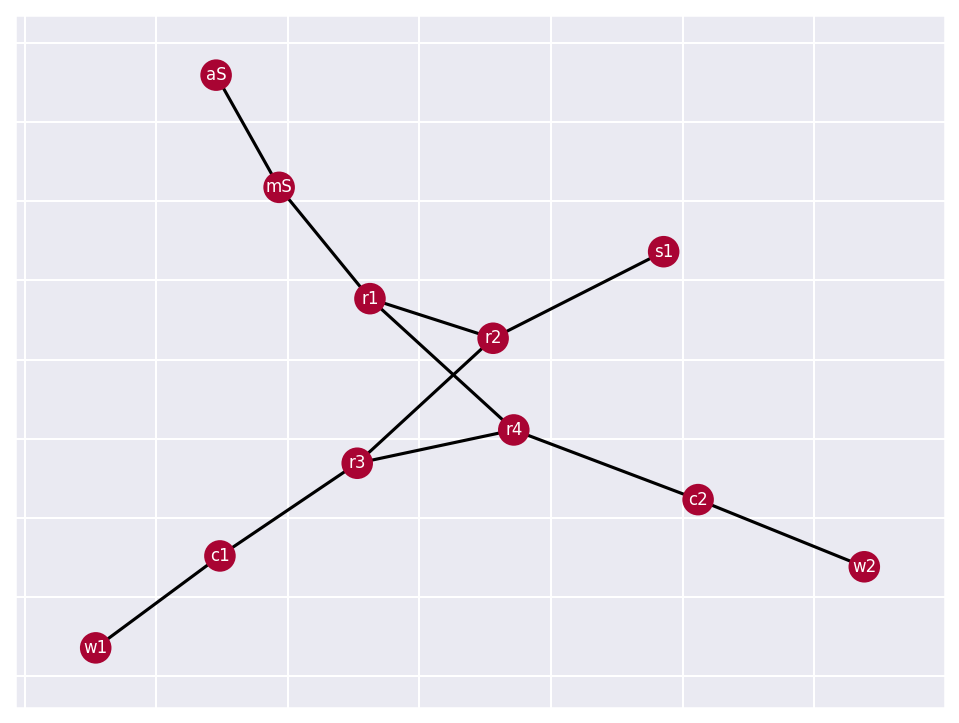

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-08-13 06:12:43,711] Sending distributed configurations to devices is completed


In [9]:
API.run_current_experiment_phase()

[INFO][2024-08-13 06:12:43,718] Experiment phase: training_phase1 of type training starts running...
[INFO][2024-08-13 06:12:43,719] Sending data to sources
[INFO][2024-08-13 06:12:44,979] Data is ready in sources
[INFO][2024-08-13 06:12:44,980] Phase training requested from Main Server
[INFO][2024-08-13 06:20:51,703] Processing experiment phase data
[INFO][2024-08-13 06:20:51,718] Processing experiment phase data completed
[INFO][2024-08-13 06:20:51,719] Start generating communication statistics for training_phase1 of type training
[INFO][2024-08-13 06:20:51,719] Statistics requested from Main Server
[INFO][2024-08-13 06:20:52,125] Statistics received from Main Server
[INFO][2024-08-13 06:20:52,126] Phase of training_phase1 training completed


In [10]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

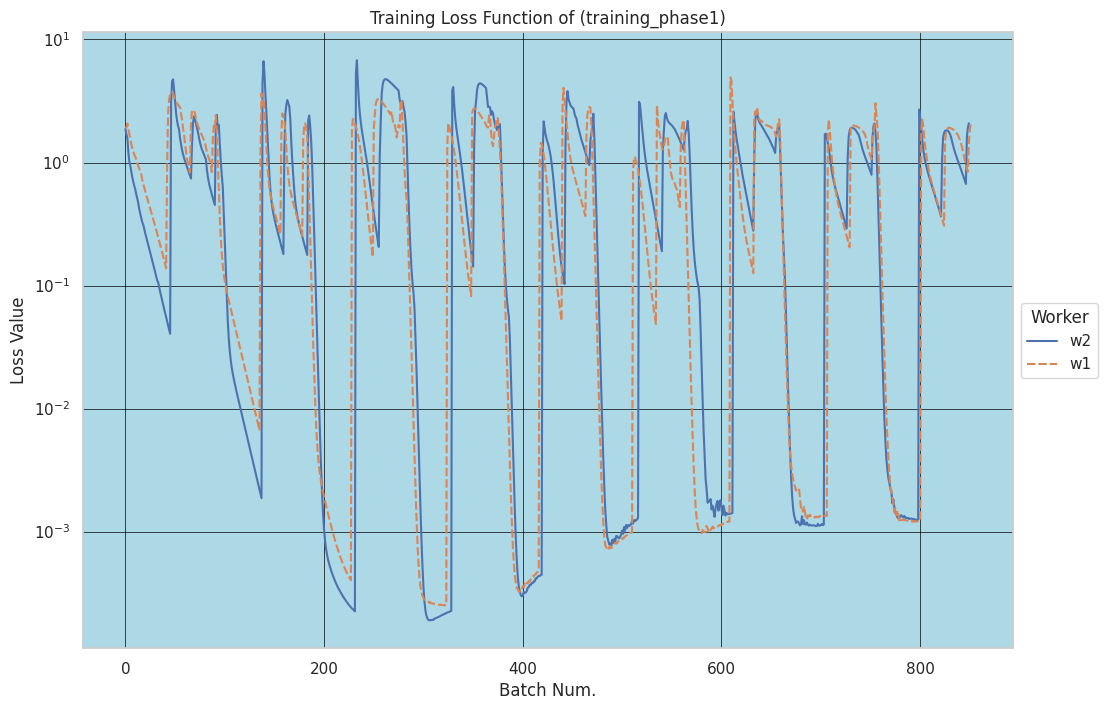

,w2,w1
0,1.866266,1.928381
1,1.699372,1.912727
2,1.568465,2.072769
3,1.208535,1.872856
4,1.010661,1.693331
...,...,...
847,1.611705,0.894486
848,1.924645,0.841642
849,2.083571,1.438735
850,NaN,1.858974


In [11]:
stats_train1.get_loss_ts(plot=True ,smoothing=True, log_plot=True)

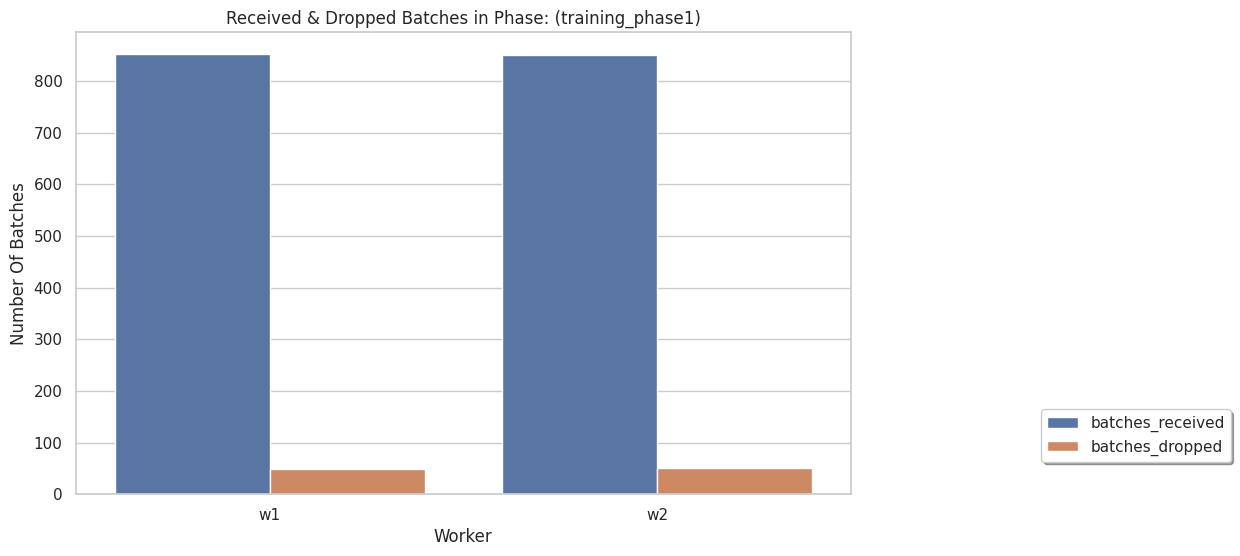

In [12]:
stats_train1.plot_batches_status(plot=True)

In [13]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-13 06:20:53,173] Experiment phase: training_phase2 of type training starts running...
[INFO][2024-08-13 06:20:53,174] Sending data to sources
[INFO][2024-08-13 06:20:54,489] Data is ready in sources
[INFO][2024-08-13 06:20:54,490] Phase training requested from Main Server
[INFO][2024-08-13 06:28:57,373] Processing experiment phase data
[INFO][2024-08-13 06:28:57,388] Processing experiment phase data completed
[INFO][2024-08-13 06:28:57,389] Start generating communication statistics for training_phase2 of type training
[INFO][2024-08-13 06:28:57,390] Statistics requested from Main Server
[INFO][2024-08-13 06:28:57,794] Statistics received from Main Server
[INFO][2024-08-13 06:28:57,795] Phase of training_phase2 training completed


In [14]:
stats_train2 = API.get_experiment_flow(exp_name).generate_stats()

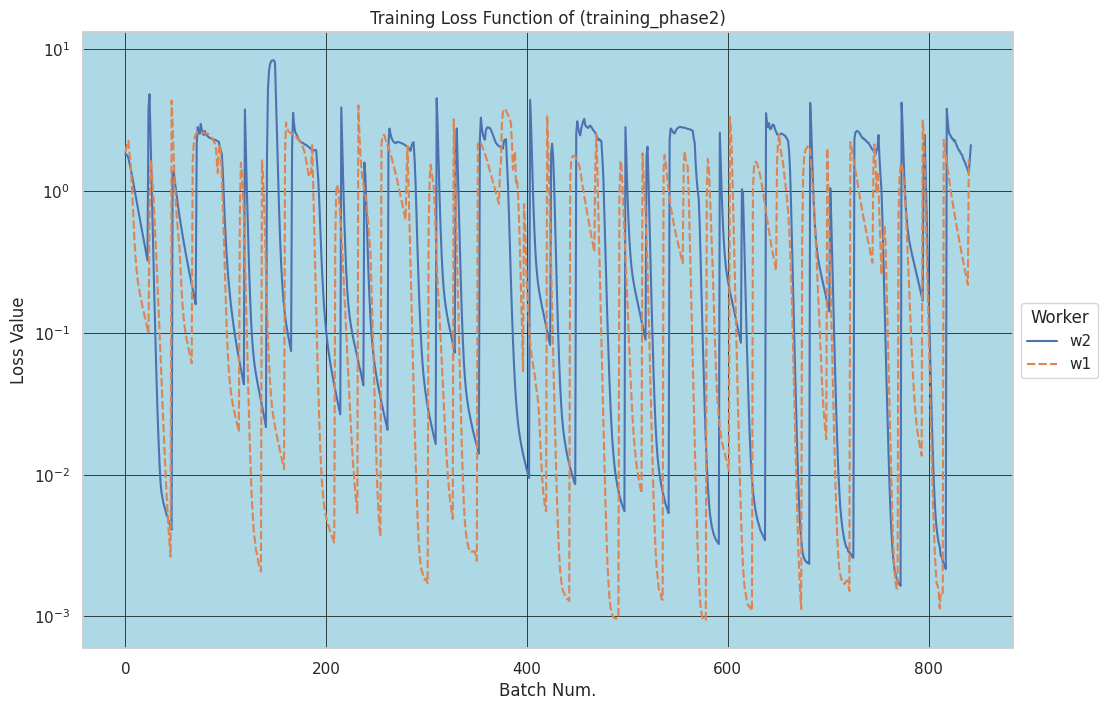

,w2,w1
0,1.823297,1.865888
1,1.797675,2.028763
2,1.772602,2.199194
3,1.695604,2.250243
4,1.580318,1.866805
...,...,...
838,1.458676,0.235841
839,1.402608,0.217715
840,1.336075,1.690254
841,1.687716,NaN


In [15]:
stats_train2.get_loss_ts(plot=True ,smoothing=True, log_plot=True)

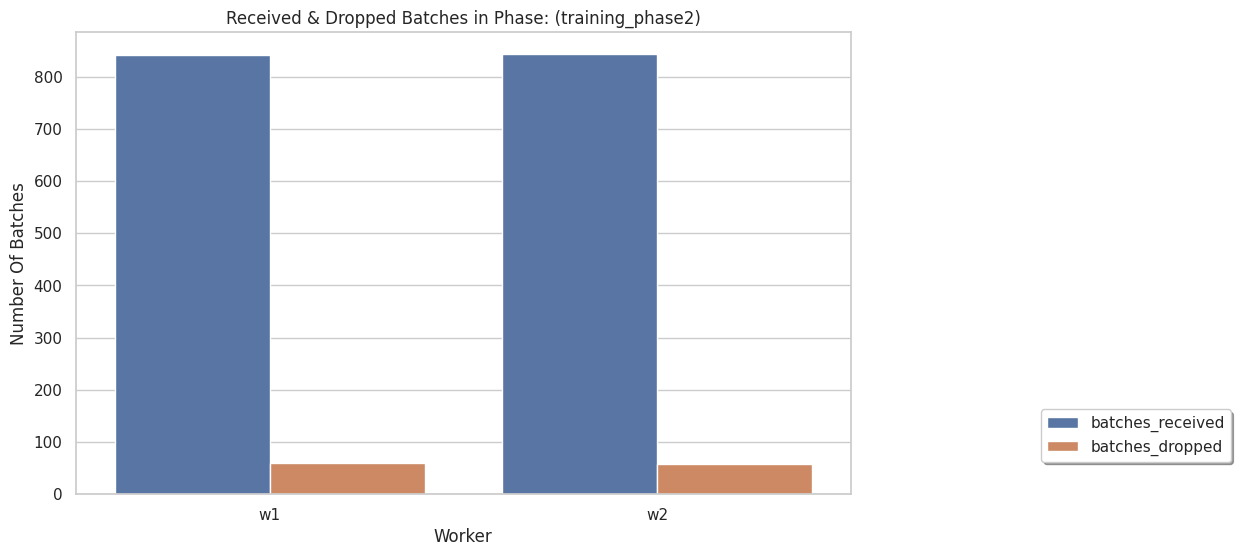

In [16]:
stats_train2.plot_batches_status(plot=True)

In [17]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-13 06:28:58,679] Experiment phase: prediction_phase1 of type prediction starts running...
[INFO][2024-08-13 06:28:58,679] Sending data to sources
[INFO][2024-08-13 06:28:59,428] Data is ready in sources
[INFO][2024-08-13 06:28:59,430] Phase prediction requested from Main Server
[INFO][2024-08-13 06:29:03,602] Processing experiment phase data
[INFO][2024-08-13 06:29:03,605] Processing experiment phase data completed
[INFO][2024-08-13 06:29:03,608] Start generating communication statistics for prediction_phase1 of type prediction
[INFO][2024-08-13 06:29:03,609] Statistics requested from Main Server
[INFO][2024-08-13 06:29:04,014] Statistics received from Main Server
[INFO][2024-08-13 06:29:04,015] Phase of prediction_phase1 prediction completed


In [18]:
stats_pred1 = API.get_experiment_flow(exp_name).generate_stats()

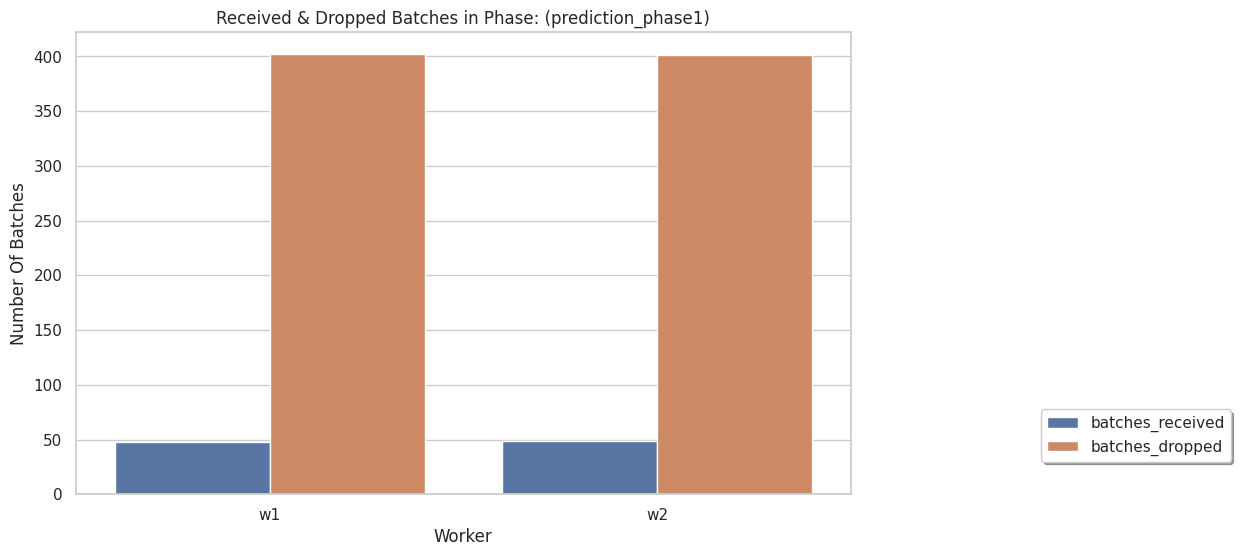

In [19]:
stats_pred1.plot_batches_status(plot=True)

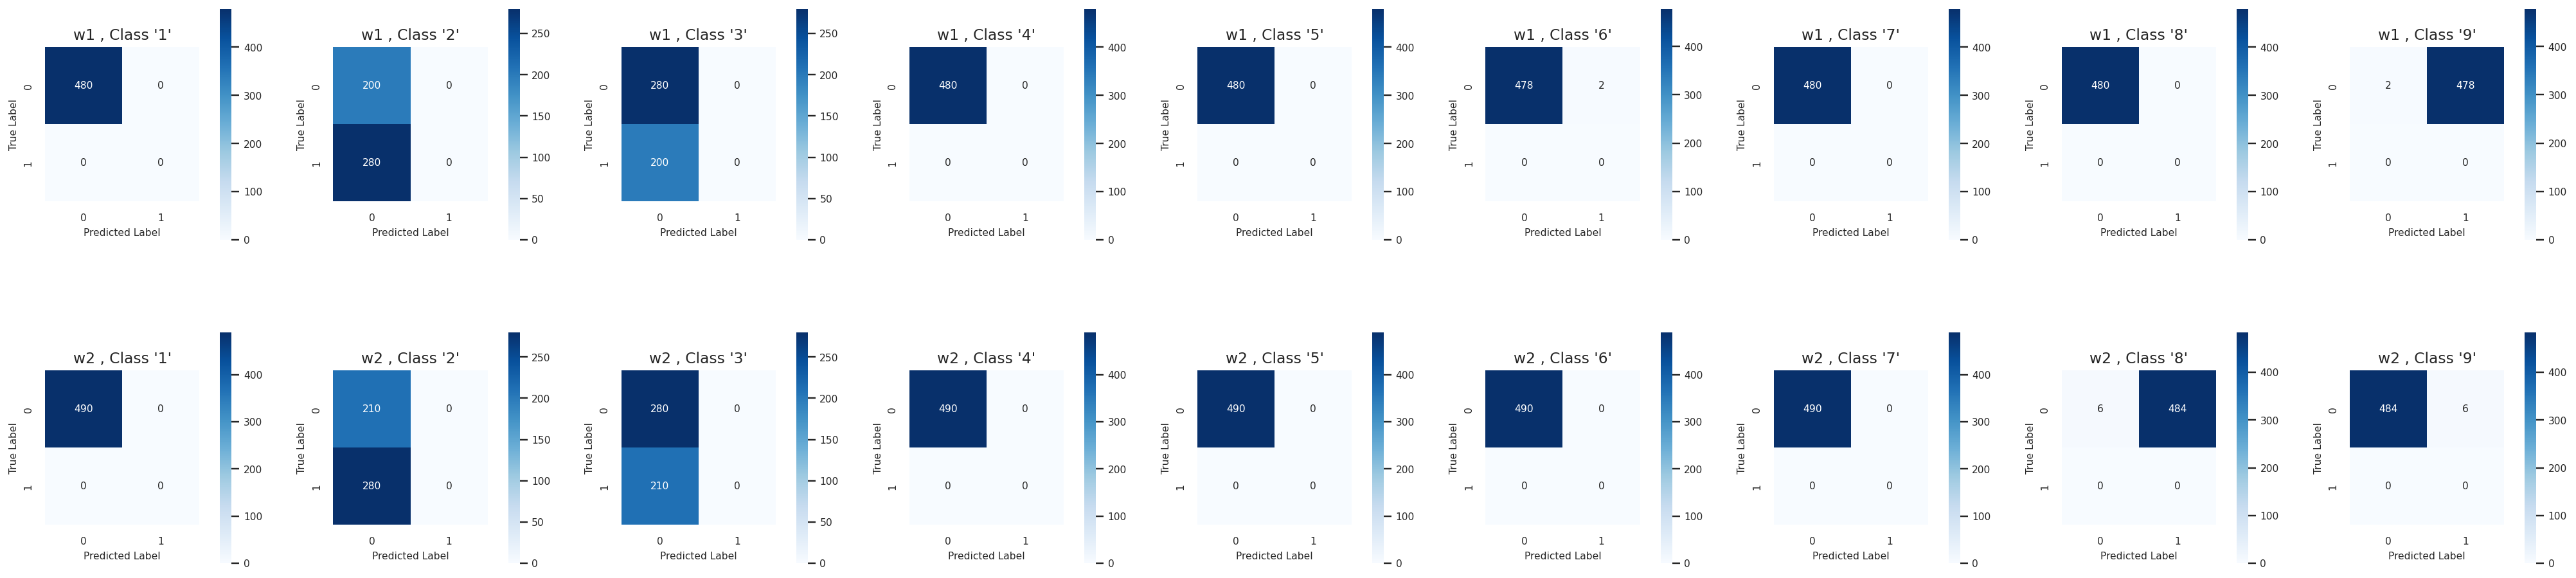

In [21]:
_ , conf_mats1 = stats_pred1.get_confusion_matrices(plot=True)

In [22]:
stats_pred1.get_model_performence_stats(conf_mats1 , show = True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,1,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
1,w1,2,200,0,280,0,0.416667,0.500000,0,0,1.000000,0.000000,0
2,w1,3,280,0,200,0,0.583333,0.500000,0,0,1.000000,0.000000,0
3,w1,4,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
4,w1,5,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
5,w1,6,478,2,0,0,0.995833,0.497917,0,0,0.995833,-0.004167,0
6,w1,7,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
7,w1,8,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
8,w1,9,2,478,0,0,0.004167,0.002083,0,0,0.004167,-0.995833,0
9,w2,1,490,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0


,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,1,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
1,w1,2,200,0,280,0,0.416667,0.500000,0,0,1.000000,0.000000,0
2,w1,3,280,0,200,0,0.583333,0.500000,0,0,1.000000,0.000000,0
3,w1,4,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
4,w1,5,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
5,w1,6,478,2,0,0,0.995833,0.497917,0,0,0.995833,-0.004167,0
6,w1,7,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
7,w1,8,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
8,w1,9,2,478,0,0,0.004167,0.002083,0,0,0.004167,-0.995833,0
9,w2,1,490,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0


In [23]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-13 06:35:03,667] Experiment phase: prediction_phase2 of type prediction starts running...
[INFO][2024-08-13 06:35:03,670] Sending data to sources
[INFO][2024-08-13 06:35:04,442] Data is ready in sources
[INFO][2024-08-13 06:35:04,443] Phase prediction requested from Main Server
[INFO][2024-08-13 06:35:08,524] Processing experiment phase data
[INFO][2024-08-13 06:35:08,527] Processing experiment phase data completed
[INFO][2024-08-13 06:35:08,530] Start generating communication statistics for prediction_phase2 of type prediction
[INFO][2024-08-13 06:35:08,531] Statistics requested from Main Server
[INFO][2024-08-13 06:35:08,936] Statistics received from Main Server
[INFO][2024-08-13 06:35:08,937] Phase of prediction_phase2 prediction completed


In [24]:
stats_pred2 = API.get_experiment_flow(exp_name).generate_stats()

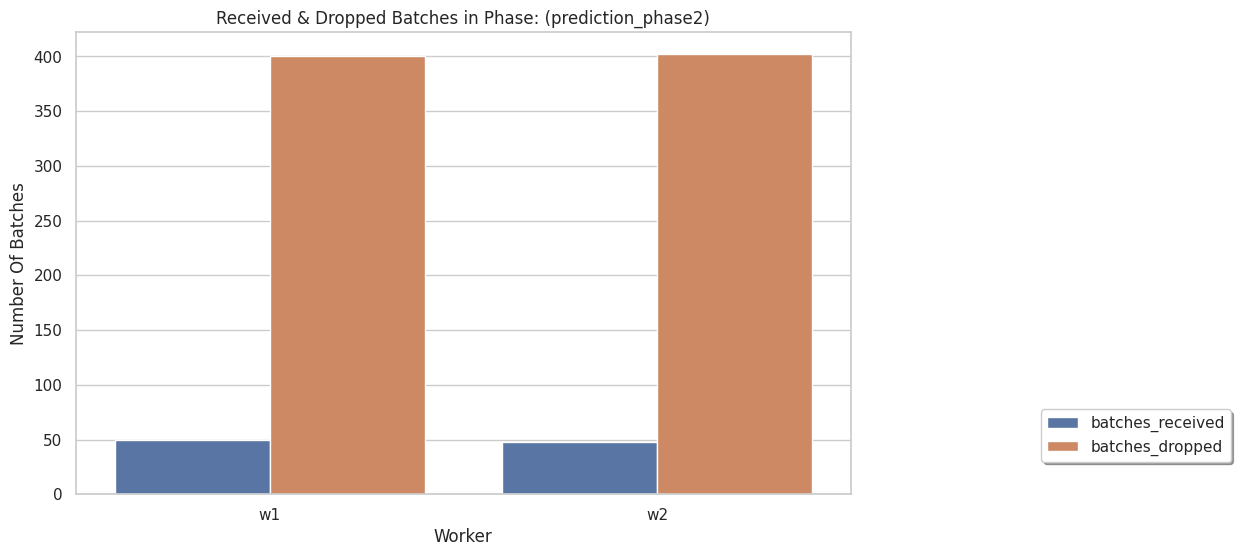

In [25]:
stats_pred2.plot_batches_status(plot=True)

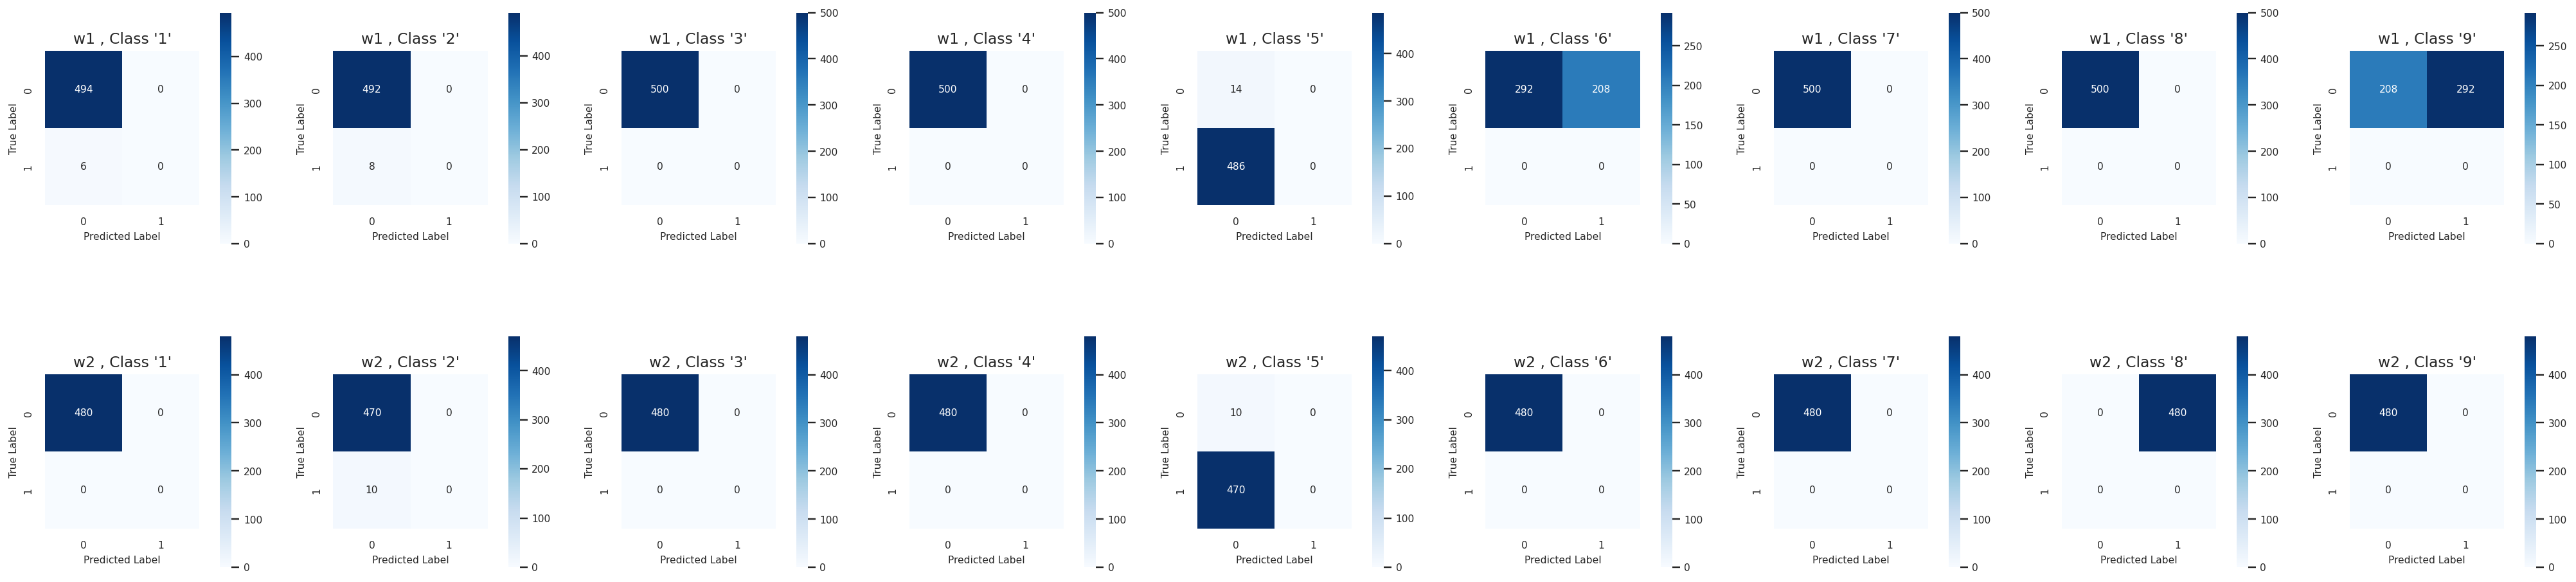

In [27]:
_ , conf_mats2 = stats_pred2.get_confusion_matrices(plot=True)

In [28]:
stats_pred2.get_model_performence_stats(conf_mats2 , show = True)

,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,1,494,0,6,0,0.988000,0.500000,0,0,1.000000,0.000000,0
1,w1,2,492,0,8,0,0.984000,0.500000,0,0,1.000000,0.000000,0
2,w1,3,500,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
3,w1,4,500,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
4,w1,5,14,0,486,0,0.028000,0.500000,0,0,1.000000,0.000000,0
5,w1,6,292,208,0,0,0.584000,0.292000,0,0,0.584000,-0.416000,0
6,w1,7,500,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
7,w1,8,500,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0
8,w1,9,208,292,0,0,0.416000,0.208000,0,0,0.416000,-0.584000,0
9,w2,1,480,0,0,0,1.000000,0.500000,0,0,1.000000,0.000000,0


,Worker,Class,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Precision,Recall,True Negative Rate,Informedness,F1
0,w1,1,494,0,6,0,0.988000,0.500,0,0,1.000,0.000,0
1,w1,2,492,0,8,0,0.984000,0.500,0,0,1.000,0.000,0
2,w1,3,500,0,0,0,1.000000,0.500,0,0,1.000,0.000,0
3,w1,4,500,0,0,0,1.000000,0.500,0,0,1.000,0.000,0
4,w1,5,14,0,486,0,0.028000,0.500,0,0,1.000,0.000,0
5,w1,6,292,208,0,0,0.584000,0.292,0,0,0.584,-0.416,0
6,w1,7,500,0,0,0,1.000000,0.500,0,0,1.000,0.000,0
7,w1,8,500,0,0,0,1.000000,0.500,0,0,1.000,0.000,0
8,w1,9,208,292,0,0,0.416000,0.208,0,0,0.416,-0.584,0
9,w2,1,480,0,0,0,1.000000,0.500,0,0,1.000,0.000,0
